In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math
from scipy import signal
from scipy.fftpack import fft
from scipy import ndimage
from scipy import special
import math
%matplotlib inline

In [2]:
def K(x,s):
    return(np.exp(-(x/s)**2))

In [5]:
def temporal(t):
    k1 = 2.
    sigma_1 = 30
    u1 = 80
    k2 = 1.8
    sigma_2 = 45
    u2 = 180
    kernal1 = (k1/np.sqrt(2*np.pi)/sigma_1)*np.exp(-(t-u1)**2/(2*sigma_1**2))
    kernal2 = (k2/np.sqrt(2*np.pi)/sigma_2)*np.exp(-(t-u2)**2/(2*sigma_2**2))
    return kernal1-kernal2

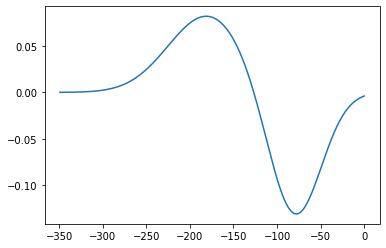

In [6]:
#Temporal kernal
tp = temporal(np.arange(0,350))
tp = tp/sum(tp)
plt.plot(np.arange(-349,1),-np.flip(tp))

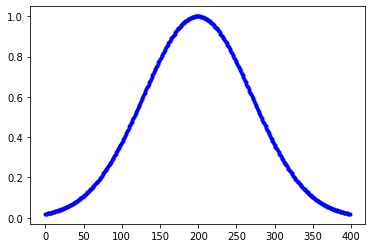

In [7]:
sigma_h = 1# RF size of horizontal cell
sigma_c = 2*sigma_h/3# RF size of cone cell
gamma = 1/(sigma_c**2)
klen = 2*sigma_h# half of width of horizontal kernal
dx = 0.01*sigma_h
##Create spatial kernal
xx = np.arange(0,klen,dx)
khxs = K(xx,sigma_h)
KH = np.zeros(int(klen*2/dx)-1)
tmp = khxs[::-1]
KH[0:int(klen/dx)]= tmp[0:int(klen/dx)]
KH[int(klen/dx):2*int(klen/dx)]=khxs[1:int(klen/dx)]
plt.plot(KH,'b.')

In [8]:
# Matching with Gussian profile with convoluted result
xlen = 10*sigma_h #spatial extend of simulation
hw =0.75*sigma_h#half bar width
tempx = np.arange(0,xlen,dx)

In [36]:
dt = 0.001
#alpha = 20
alpha = 80
beta = 2
#beta = 2
k = 500
g = 1/15
phi = 1.
B = g*k*phi/alpha/beta#*np.sqrt(4*np.pi)
print(B)
v = 3*sigma_h
pos_0 = 3*sigma_h#The center of the bar also where the bar start
nstep = 2000#time step of simulation

y = np.zeros(int(xlen/dx)) # cone cell output
z = np.zeros(int(xlen/dx)) # horizontal cell output
ry = np.convolve(y,KH,'same')# feedback from horizontal cell (y convoluted with horitonatl cell receptive field KH)
rz = np.convolve(z,KH,'same')# feedback from horizontal cell (z convoluted with horitonatl cell receptive field KH)

speak = np.zeros(nstep)#Peak of stimulus
rpeak = np.zeros(nstep)#Cone cell peak

stm = np.zeros([int(xlen/dx),nstep])#input
rsp = np.zeros([int(xlen/dx),nstep])#y output
zts = np.zeros([int(xlen/dx),nstep])#horizontal
for i in range(nstep):

    #if i < 400:
    pos = pos_0 + v*dt*i
    #if i > 400 and i <800:
    #    pos = pos - v*dt
    speak[i] = pos
    rs = special.erf((tempx-pos+hw)/sigma_c) - special.erf((tempx-pos-hw)/sigma_c)
    
    dyj =(-alpha*y+k*(rs-phi*rz))*dt
    dzj =(-beta*z+g*y)*dt
    y = (y+dyj)
    z = (z+dzj)
    

    stm[:,i] = rs.copy()
    rsp[:,i] = y.copy()
    zts[:,i] = z.copy()
    
    if i <= len(tp)+100:
        ry = np.convolve(y,KH,'same')# feedback from horizontal cell (y convoluted with horitonatl cell receptive field KH)
        rz = np.convolve(z,KH,'same')# feedback from horizontal cell (z convoluted with horitonatl cell receptive field KH)
    else:
        for j in range(int(xlen/dx)):
            y[j] = np.sum(tp*rsp[j,i-len(tp):i])*dt
        ry = np.convolve(y,KH,'same')# feedback from horizontal cell (y convoluted with horitonatl cell receptive field KH)
        rz = np.convolve(z,KH,'same')# feedback from horizontal cell (z convoluted with horitonatl cell receptive field KH)
        
    maxpos = np.argmax(y)
    rpeak[i]= maxpos*dx 


0.20833333333333334


In [37]:
#####PLot numerical solution########
# plt.plot(tempx,y,'b')#numerical solution
# plt.plot(tempx,-z,'r')#numerical solution
# print('B is '+str(B))
# # distance travelled
# plt.figure()
# plt.plot(speak-pos_0)

400


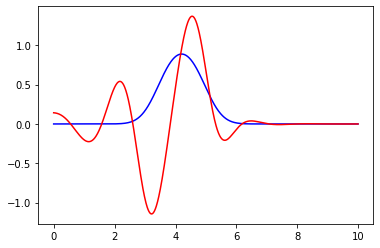

500


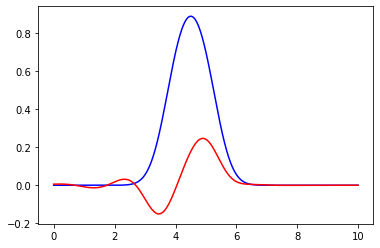

600


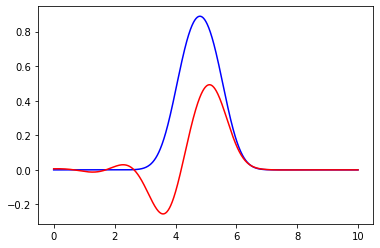

700


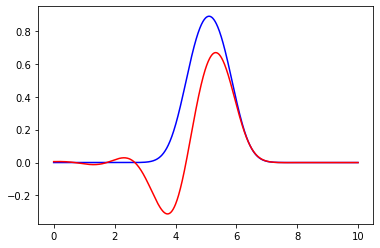

800


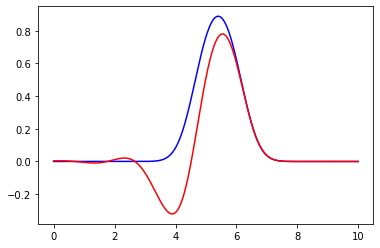

900


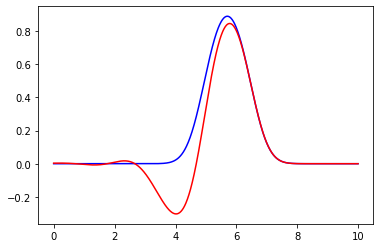

1000


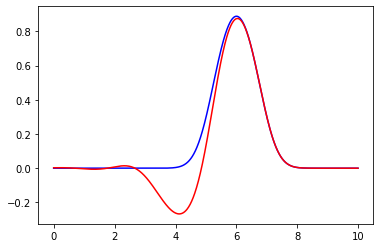

1100


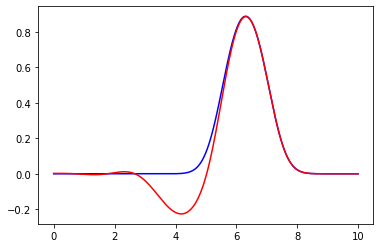

1200


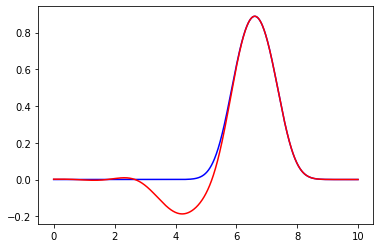

1300


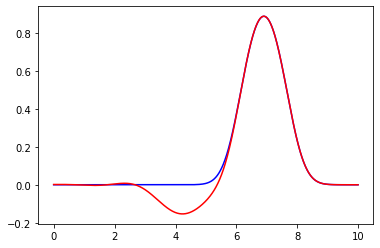

1400


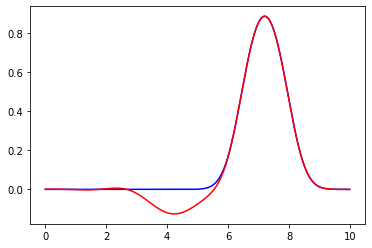

1500


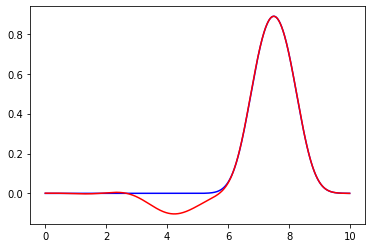

1600


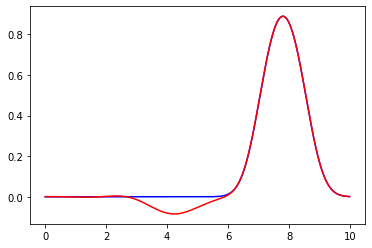

1700


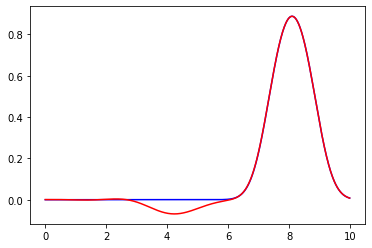

1800


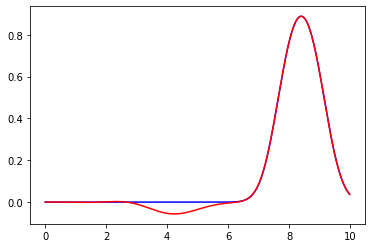

1900


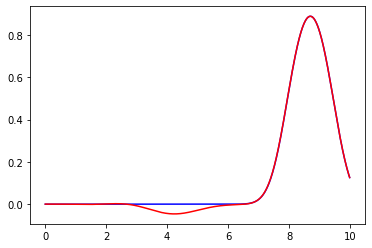

In [38]:
# snapshot at different time

for index in np.arange(len(tp)+50,nstep,100):
    print(index)
    plt.figure()
    #index=10 # large response; weak feedback
    plt.plot(tempx,stm[:,index]*0.5,'b')#stimulus
    plt.plot(tempx,rsp[:,index],'r')#y
    #plt.plot(tempx,-zts[:,index],'g')#z
    plt.show()


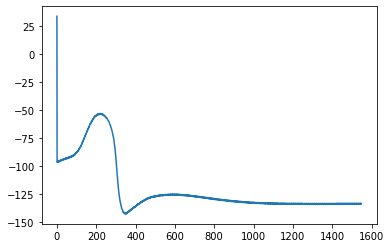

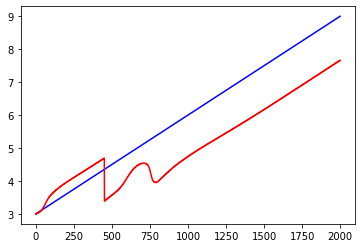

In [39]:
# difference between stimualtion and response peak
plt.plot((rpeak[1*len(tp)+100:-1]-speak[1*len(tp)+100:-1])/dx)
#plt.ylim([0,15])


plt.figure()
plt.plot(speak,'b')
plt.plot(rpeak,'r')
#plt.xlim([350,450])